### Chicago Crime Analysis - Analyzing ShotSpotter Data (2017-2024) and Gun Violence Crime in Chicago from 2010 to 2024. (as of November 16th 2024).
#### By: Angel Moreno 

* Link to shotspotter data: https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Shotspotter-Alerts-Historical/3h7q-7mdb/about_data 
* Link to victim demographic data: https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Victim-Demographics-Aggregated/gj7a-742p/about_data
* Link to fatal/non-fatal shootings: https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Victims-of-Homicides-and-Non-Fa/gumc-mgzr/about_data

# You and Data Science - Part I

## Section 1 - Dataset Introduction and Cleaning

Importing the libraries I have used in this project:

In [529]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import math
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn 
from statsmodels.stats.weightstats import ztest

In [530]:
df_shotspotter = pd.read_csv("violence-reduction-shotspotter-alerts.csv")
df_demographic = pd.read_csv("violence-reduction-demographics.csv")
df_shootings = pd.read_csv("violence-reduction-homicide-and-non-fatal-shootings.csv")

### Why did I choose the datasets I did?

This summer I performed a data analysis on Chicago crime data from July 2023 to July 2024 (one year prior). I learned the neccessary skills for the project thanks to the DPI summer data science program and I was happy with my analysis as I was able to create interesting visualizations and answer questions through hypothesis testing. I was inspired to do my project on Chicago crime data due to the two UChicago Crime Lab speakers that came to speak on the sort of work they did, which I found impactful and interesting. However, I finishsed the anaylsis hoping I would perform another data analysis on one specific type of crime in the future. 

Therefore, the three datasets I have loaded were fit to explore gun crime specifically in Chicago, rather than generally exploring crime from one year prior. Also, I wanted to perform an analysis using data from a larger time frame and these datasets have plenty of data to do so.  

One thing to know: a **ShotSpotter** is a piece of technology that notifies Chicago pd of a potential gunshot(s) in an area using triangulation. 

### What does the data in each dataframe contain?

* **df_shotspotter** -> Contains shotspotter alerts from 2017 until its termination date in September 22, 2024. 
* **df_demographic** -> Aggregated dataset (at the quarterly level) of victimizations from 1991 to present. The dataset contains shooting data from 2010 to present. 
* **df_shootings** -> Dataset of homicides and non-fatal shooting victimizations from 1991 to present. The dataset contains shooting data from 2010 to present. 

All of the data comes from the City of Chicago Data Portal, an open data source containing real data about various sectors within Chicago. 

From reading the descriptions on the https://data.cityofchicago.org/ website, I have concluded that I will cutoff my data for **df_demographic** and **df_shootings** to be from 2010 to present. This way, I will be able to compare gun violence rates before 2017 (the year Shotpotter was implemented in Chicago) to rates after 2017. I should have a good amount of shooting data from 2010 to 2017 and 2017 to 2024.

### Samples of each dataframe


In [531]:
df_shotspotter.sample(5)

,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,MONTH,DAY_OF_WEEK,HOUR,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION
210623,04/03/2023 08:38:44 PM,6300 SOUTH HOYNE AVENUE,60636.0,16.0,WEST ENGLEWOOD,1.0,7.0,726.0,TADC West Englewood | READI 60631,SST-814186,4,2,20,MULTIPLE GUNSHOTS,7,6.0,3.0,41.777854,-87.676005,POINT (-87.676004558699 41.777853904142)
173682,07/18/2019 01:08:14 AM,5000 S WASHINGTON PARK,60615.0,20.0,GRAND BOULEVARD,1.0,2.0,223.0,Acclivus Grand Boulevard,SST-71619,7,5,1,MULTIPLE GUNSHOTS,2,26.0,13.0,41.803063,-87.616068,POINT (-87.616068058699 41.803063395858)
190552,01/01/2024 01:40:32 AM,"8300 S LUELLA AVE,",60617.0,7.0,SOUTH CHICAGO,2.0,4.0,412.0,NaN,SST-77900457570,1,2,1,MULTIPLE GUNSHOTS,10,33.0,17.0,41.744194,-87.569065,POINT (-87.569064747471 41.744193868947)
157603,07/23/2022 03:38:10 AM,2300 N MULLIGAN AVE,60639.0,36.0,BELMONT CRAGIN,3.0,25.0,2512.0,ALSO Belmont Cragin,SST-611106,7,7,3,GUNSHOT OR FIRECRACKER,2,3.0,2.0,41.922423,-87.784670,POINT (-87.784669958699 41.922423304142)
166091,08/03/2023 10:46:45 PM,200 W 107TH ST,60628.0,21.0,ROSELAND,2.0,5.0,513.0,CRED South Side,SST-663080,8,5,22,SINGLE GUNSHOT,1,28.0,14.0,41.700363,-87.629612,POINT (-87.629611647471 41.700362968947)


In [532]:
df_demographic.sample(5)

,TIME_PERIOD,TIME_PERIOD_START,TIME_PERIOD_END,PRIMARY_TYPE,AGE,SEX,RACE,JUVENILE_I,DOMESTIC_I,GUNSHOT_INJURY_I,NUMBER_OF_VICTIMS
25050,2001 Q2,03/01/2001,06/30/2001,ROBBERY,50-59,F,BLK,False,True,UNKNOWN,2
14091,2021 Q1,01/01/2021,03/31/2021,BATTERY,40-49,F,WWH,False,True,NO,8
7636,2005 Q4,10/01/2005,12/31/2005,ASSAULT,20-29,M,WHI,False,False,UNKNOWN,37
32168,2004 Q2,03/01/2004,06/30/2004,BATTERY,30-39,M,WWH,False,False,UNKNOWN,70
28023,2016 Q3,07/01/2016,09/30/2016,ROBBERY,0-19,M,WHI,True,False,NO,22


In [533]:
df_shootings.sample(5)

,CASE_NUMBER,DATE,BLOCK,VICTIMIZATION_PRIMARY,INCIDENT_PRIMARY,GUNSHOT_INJURY_I,UNIQUE_ID,ZIP_CODE,WARD,COMMUNITY_AREA,...,MONTH,DAY_OF_WEEK,HOUR,LOCATION_DESCRIPTION,STATE_HOUSE_DISTRICT,STATE_SENATE_DISTRICT,UPDATED,LATITUDE,LONGITUDE,LOCATION
5885,A099977,02/12/1996 09:46:00 PM,12000 S PERRY AVE,HOMICIDE,HOMICIDE,YES,HOM-A099977-#1,60628.0,9.0,WEST PULLMAN,...,2,2,21,STREET,29.0,15.0,08/25/2009 02:50:36 PM,41.675482,-87.625285,POINT (-87.62528534612 41.675481654142)
30625,JC246231,05/02/2019 12:15:00 AM,0 E 113TH PL,BATTERY,BATTERY,YES,SHOOT-JC246231-#1,60628.0,9.0,ROSELAND,...,5,5,0,SIDEWALK,28.0,14.0,05/27/2019 11:35:50 PM,41.688663,-87.622161,POINT (-87.622160941301 41.688663095858)
46475,JD230569,05/12/2020 03:34:00 PM,5400 S KEELER AVE,HOMICIDE,HOMICIDE,YES,HOM-JD230569-#1,60632.0,23.0,WEST ELSDON,...,5,3,15,STREET,22.0,11.0,07/06/2020 09:46:38 AM,41.794403,-87.728209,POINT (-87.728209058699 41.794403095858)
55657,HY454710,10/08/2015 08:29:00 PM,5900 W CHICAGO AVE,BATTERY,HOMICIDE,YES,SHOOT-HY454710-#1,60651.0,29.0,AUSTIN,...,10,5,20,ALLEY,78.0,39.0,03/03/2016 12:36:37 AM,41.895440,-87.772639,POINT (-87.772638547471 41.895439668947)
3962,HZ190016,03/16/2016 10:05:00 PM,6700 S ARTESIAN AVE,BATTERY,BATTERY,YES,SHOOT-HZ190016-#1,60629.0,16.0,CHICAGO LAWN,...,3,4,22,ALLEY,6.0,3.0,04/08/2017 08:52:34 PM,41.770477,-87.685049,POINT (-87.685049058699 41.770476904142)


### What does a row mean in each dataset?

A row in **df_shotspotter** represents a shotspotter alert. 

A row in **df_demographic** represents a victimization report grouped by victimization type, quarter of the year, age group, sex, race, and whether the incident was domestic-related.

A row in **df_shootings** represents a victimization where someone was victim to a homicide or non-fatal shooting.

### Cleaning and modifying each dataframe:

In [534]:
print(f"This is the shape of the ShotSpotter dataset before cleaning: {df_shotspotter.shape} (rows, columns)")
print(f"This is the shape of the Demographic dataset before cleaning: {df_demographic.shape} (rows, columns)")
print(f"This is the shape of the Shootings dataset before cleaning: {df_shootings.shape} (rows, columns)")

This is the shape of the ShotSpotter dataset before cleaning: (222108, 20) (rows, columns)
This is the shape of the Demographic dataset before cleaning: (55021, 11) (rows, columns)
This is the shape of the Shootings dataset before cleaning: (60673, 38) (rows, columns)


Dropping na values for df_demographic since dropping for the other datasets results in a big loss of data. 

In [535]:
df_demographic = df_demographic.dropna().reset_index(drop=True)
# df_shootings.dropna() -> drops too many entries
# df_shotspotter.dropna() -> drops too many entries

In [536]:
print(f"This is the shape of the ShotSpotter dataset after dropping na values: {df_demographic.shape} (rows, columns)")

This is the shape of the ShotSpotter dataset after dropping na values: (51888, 11) (rows, columns)


I am doing this to know the type of data that will be available to work with. 
Finding unique column names in each dataset:

In [537]:
print(f"These are the unique Demographic column names: {df_demographic.columns}")
print(f"These are the unique Shootings column names: {df_shootings.columns}")
print(f"These are the unique Shotspotter column names: {df_shotspotter.columns}")

These are the unique Demographic column names: Index(['TIME_PERIOD', 'TIME_PERIOD_START', 'TIME_PERIOD_END', 'PRIMARY_TYPE',
       'AGE', 'SEX', 'RACE', 'JUVENILE_I', 'DOMESTIC_I', 'GUNSHOT_INJURY_I',
       'NUMBER_OF_VICTIMS'],
      dtype='object')
These are the unique Shootings column names: Index(['CASE_NUMBER', 'DATE', 'BLOCK', 'VICTIMIZATION_PRIMARY',
       'INCIDENT_PRIMARY', 'GUNSHOT_INJURY_I', 'UNIQUE_ID', 'ZIP_CODE', 'WARD',
       'COMMUNITY_AREA', 'STREET_OUTREACH_ORGANIZATION', 'AREA', 'DISTRICT',
       'BEAT', 'AGE', 'SEX', 'RACE', 'VICTIMIZATION_FBI_CD', 'INCIDENT_FBI_CD',
       'VICTIMIZATION_FBI_DESCR', 'INCIDENT_FBI_DESCR',
       'VICTIMIZATION_IUCR_CD', 'INCIDENT_IUCR_CD',
       'VICTIMIZATION_IUCR_SECONDARY', 'INCIDENT_IUCR_SECONDARY',
       'HOMICIDE_VICTIM_FIRST_NAME', 'HOMICIDE_VICTIM_MI',
       'HOMICIDE_VICTIM_LAST_NAME', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'LOCATION_DESCRIPTION', 'STATE_HOUSE_DISTRICT', 'STATE_SENATE_DISTRICT',
       'UPDATED', 'L

After running the above cell, I see that there is latitude and longitude location data which will be very useful in creating visualizations of incidents in the Chicago map. Since there is a large number of data available the plotted locations should, in theory, form a map. 

Cutting off the years to be from 2010 to present for **df_demographic** and converting the appropriate time columns to Timestamp data:

In [538]:
df_demographic["Year"] = df_demographic["TIME_PERIOD"].str[0:4]
df_demographic["Quarter"] = df_demographic["TIME_PERIOD"].str[6:]

In [539]:
df_demographic["Year"] = pd.to_datetime(df_demographic["Year"]).dt.year

In [540]:
df_demographic = df_demographic.sort_values(by="Year")

In [541]:
# prior to filtering for 2010 to present
df_demographic.shape

(51888, 13)

In [542]:
df_demographic = df_demographic[df_demographic["Year"] >= 2010]

In [543]:
# after filtering for 2010 to present
df_demographic.shape

(33362, 13)

Cutting off the years to be from 2010 to present for **df_shootings** and converting the appropriate time columns to Timestamp data:

In [544]:
df_shootings["DATE"] = pd.to_datetime(df_shootings["DATE"])
# sorting by year = ascending
df_shootings["Year"] = df_shootings["DATE"].dt.year
# adding a month column
df_shootings["Month"] = df_shootings["DATE"].dt.month
df_shootings = df_shootings.sort_values(by="DATE")

C:\Users\slplm\AppData\Local\Temp\ipykernel_27836\68994932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_shootings["DATE"] = pd.to_datetime(df_shootings["DATE"])


In [545]:
# print(f"DATE column of df_shootings is now: {type(df_shootings["DATE"][0])}")
print(f"DATE column of df_shootings now looks like: {df_shootings["DATE"][0]}")

DATE column of df_shootings now looks like: 2022-03-08 15:27:00


In [546]:
# shape prior to filtering
print(f"df_shootings shape before filtering by year: {df_shootings.shape}") 
#including 2010 and greater
df_shootings = df_shootings[df_shootings["DATE"].dt.year >= 2010]
# shape after filtering
print(f"df_shootings shape after filtering by year: {df_shootings.shape}") 

df_shootings shape before filtering by year: (60673, 40)
df_shootings shape after filtering by year: (47913, 40)


In [547]:
# number of times a ward is described as NA
print(len(df_shotspotter[df_shotspotter["WARD"].isna()]))
# dropping these rows
df_shotspotter = df_shotspotter.dropna(subset="WARD").reset_index(drop=True)
df_shotspotter

516


,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,MONTH,DAY_OF_WEEK,HOUR,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION
0,03/15/2020 09:31:15 PM,9200 S GREENWOOD AVE,60619.0,8.0,BURNSIDE,2.0,4.0,413.0,UCAN Roseland,SST-100482,3,1,21,SINGLE GUNSHOT,1,33.0,17.0,41.727651,-87.597183,POINT (-87.59718275388 41.727651145858)
1,01/05/2020 07:49:48 PM,700 W 33RD ST,60616.0,11.0,BRIDGEPORT,1.0,9.0,915.0,NaN,SST-100738,1,1,19,MULTIPLE GUNSHOTS,3,2.0,1.0,41.834817,-87.645829,POINT (-87.64582874612 41.834817445858)
2,11/24/2017 04:06:15 AM,00 E 91ST ST,60619.0,6.0,CHATHAM,2.0,6.0,634.0,NaN,SST-1056,11,6,4,SINGLE GUNSHOT,1,34.0,17.0,41.728862,-87.621210,POINT (-87.621210258699 41.728861804142)
3,04/15/2020 05:11:07 PM,8400 S BENNETT AVE,60617.0,8.0,AVALON PARK,2.0,4.0,412.0,NaN,SST-105919,4,4,17,SINGLE GUNSHOT,1,33.0,17.0,41.741300,-87.578806,POINT (-87.578806058699 41.741299695858)
4,12/11/2019 04:39:46 PM,6100 W 64TH PL,60638.0,13.0,CLEARING,1.0,8.0,812.0,NaN,SST-108889,12,4,16,SINGLE GUNSHOT,1,22.0,11.0,41.776040,-87.774393,POINT (-87.774393158699 41.776040095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221587,09/20/2024 02:38:55 AM,"12400 S PARNELL AVE,",60628.0,9.0,WEST PULLMAN,2.0,5.0,523.0,Roseland Ceasefire - West Pullman | Acclivus W...,SST-78300783660,9,6,2,MULTIPLE GUNSHOTS,3,28.0,14.0,41.668114,-87.635631,POINT (-87.635631247471 41.668113568947)
221588,09/21/2024 08:59:53 PM,"9600 S EXCHANGE AVE,",60617.0,10.0,SOUTH DEERING,2.0,4.0,431.0,Claretian Associates South Deering,SST-78100552622,9,7,20,MULTIPLE GUNSHOTS,5,25.0,13.0,41.719491,-87.552207,POINT (-87.55220745388 41.719491445858)
221589,09/21/2024 01:49:22 AM,"6600 S FRANCISCO AVE,",60629.0,17.0,CHICAGO LAWN,1.0,8.0,831.0,SWOP Chicago Lawn,SST-76900757531,9,7,1,MULTIPLE GUNSHOTS,2,6.0,3.0,41.771455,-87.695555,POINT (-87.695554641301 41.771454895858)
221590,09/20/2024 11:09:16 PM,"4100 W 31ST ST,",60623.0,22.0,SOUTH LAWNDALE,4.0,10.0,1031.0,READI 60623 | New Life Centers South Lawndale ...,SST-79100207431,9,6,23,SINGLE GUNSHOT,1,24.0,12.0,41.836999,-87.727270,POINT (-87.727270041301 41.836998995858)


60673 - 47913 = **12760** rows dropped after filtering **df_shootings** to include 2010 to present.

In [548]:
print(f"This is the shape of the ShotSpotter dataset after cleaning: {df_shotspotter.shape} (rows, columns)")
print(f"This is the shape of the Demographic dataset after cleaning: {df_demographic.shape} (rows, columns)")
print(f"This is the shape of the Shootings dataset after cleaning: {df_shootings.shape} (rows, columns)")

This is the shape of the ShotSpotter dataset after cleaning: (221592, 20) (rows, columns)
This is the shape of the Demographic dataset after cleaning: (33362, 13) (rows, columns)
This is the shape of the Shootings dataset after cleaning: (47913, 40) (rows, columns)


## Section 2 - Exploratory Data Analysis

This section will contain separate EDA for each of my datasets for clarity. The order of EDAs is as follows: 
1. **df_shotspotter**
2. **df_demographic**
3. **df_shootings**

## 1. df_shotspotter EDA

Columns from **df_shotspotter** I can use for descriptive statistics -> month, rounds, hour, day of week, incident type descriptions, latitude, longitude

In [549]:
df_shotspotter

,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,MONTH,DAY_OF_WEEK,HOUR,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION
0,03/15/2020 09:31:15 PM,9200 S GREENWOOD AVE,60619.0,8.0,BURNSIDE,2.0,4.0,413.0,UCAN Roseland,SST-100482,3,1,21,SINGLE GUNSHOT,1,33.0,17.0,41.727651,-87.597183,POINT (-87.59718275388 41.727651145858)
1,01/05/2020 07:49:48 PM,700 W 33RD ST,60616.0,11.0,BRIDGEPORT,1.0,9.0,915.0,NaN,SST-100738,1,1,19,MULTIPLE GUNSHOTS,3,2.0,1.0,41.834817,-87.645829,POINT (-87.64582874612 41.834817445858)
2,11/24/2017 04:06:15 AM,00 E 91ST ST,60619.0,6.0,CHATHAM,2.0,6.0,634.0,NaN,SST-1056,11,6,4,SINGLE GUNSHOT,1,34.0,17.0,41.728862,-87.621210,POINT (-87.621210258699 41.728861804142)
3,04/15/2020 05:11:07 PM,8400 S BENNETT AVE,60617.0,8.0,AVALON PARK,2.0,4.0,412.0,NaN,SST-105919,4,4,17,SINGLE GUNSHOT,1,33.0,17.0,41.741300,-87.578806,POINT (-87.578806058699 41.741299695858)
4,12/11/2019 04:39:46 PM,6100 W 64TH PL,60638.0,13.0,CLEARING,1.0,8.0,812.0,NaN,SST-108889,12,4,16,SINGLE GUNSHOT,1,22.0,11.0,41.776040,-87.774393,POINT (-87.774393158699 41.776040095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221587,09/20/2024 02:38:55 AM,"12400 S PARNELL AVE,",60628.0,9.0,WEST PULLMAN,2.0,5.0,523.0,Roseland Ceasefire - West Pullman | Acclivus W...,SST-78300783660,9,6,2,MULTIPLE GUNSHOTS,3,28.0,14.0,41.668114,-87.635631,POINT (-87.635631247471 41.668113568947)
221588,09/21/2024 08:59:53 PM,"9600 S EXCHANGE AVE,",60617.0,10.0,SOUTH DEERING,2.0,4.0,431.0,Claretian Associates South Deering,SST-78100552622,9,7,20,MULTIPLE GUNSHOTS,5,25.0,13.0,41.719491,-87.552207,POINT (-87.55220745388 41.719491445858)
221589,09/21/2024 01:49:22 AM,"6600 S FRANCISCO AVE,",60629.0,17.0,CHICAGO LAWN,1.0,8.0,831.0,SWOP Chicago Lawn,SST-76900757531,9,7,1,MULTIPLE GUNSHOTS,2,6.0,3.0,41.771455,-87.695555,POINT (-87.695554641301 41.771454895858)
221590,09/20/2024 11:09:16 PM,"4100 W 31ST ST,",60623.0,22.0,SOUTH LAWNDALE,4.0,10.0,1031.0,READI 60623 | New Life Centers South Lawndale ...,SST-79100207431,9,6,23,SINGLE GUNSHOT,1,24.0,12.0,41.836999,-87.727270,POINT (-87.727270041301 41.836998995858)


In [550]:
df_shotspotter["ROUNDS"].describe()

count    221592.000000
mean          4.005113
std           4.373800
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         201.000000
Name: ROUNDS, dtype: float64

Descriptive statistics for amount of ShotSpotter alerts in df_shotspotter:
* Average amount of rounds fired in ShotSpotter alerts: ~4 
* Standard deviation of rounds fired in ShotSpotter alerts: 4.37226
* Minimum rounds fired in ShotSpotter alerts: 1
* Maximum rounds fired in ShotSpotter alerts: 201

**Month**

In [551]:
df_shotspotter_month = pd.DataFrame(df_shotspotter["MONTH"].value_counts()).sort_values(by="MONTH")

The cell below will be used for visualizations in the next section

In [552]:
df_shotspotter_month

,count
MONTH,
1,22005
2,12080
3,14912
4,17150
5,21001
6,21402
7,20029
8,20640
9,20779


In [553]:
df_shotspotter_avg_rounds_hour = df_shotspotter.groupby("HOUR").agg("mean", numeric_only = True).reset_index()
df_shotspotter_avg_rounds_hour = df_shotspotter_avg_rounds_hour.drop(["ZIP_CODE","WARD","AREA","DISTRICT","BEAT","MONTH","DAY_OF_WEEK","ILLINOIS_HOUSE_DISTRICT","ILLINOIS_SENATE_DISTRICT","LATITUDE","LONGITUDE"], axis=1)
df_shotspotter_avg_rounds_hour

,HOUR,ROUNDS
0,0,4.322968
1,1,4.114984
2,2,4.011847
3,3,3.883594
4,4,3.686331
5,5,3.661421
6,6,3.380498
7,7,3.144749
8,8,3.225338
9,9,3.298841


Average rounds fired over a 24 hour time span for each incident type.

In [554]:
df_multiple_count = df_shotspotter[df_shotspotter["INCIDENT_TYPE_DESCRIPTION"]=="MULTIPLE GUNSHOTS"].groupby("HOUR").agg("mean", numeric_only = True).reset_index().drop(["ZIP_CODE","WARD","AREA","DISTRICT","BEAT","MONTH","DAY_OF_WEEK","ILLINOIS_HOUSE_DISTRICT","ILLINOIS_SENATE_DISTRICT","LATITUDE","LONGITUDE"], axis=1)
df_single_count = df_shotspotter[df_shotspotter["INCIDENT_TYPE_DESCRIPTION"]=="SINGLE GUNSHOT"].groupby("HOUR").agg("mean", numeric_only = True).reset_index().drop(["ZIP_CODE","WARD","AREA","DISTRICT","BEAT","MONTH","DAY_OF_WEEK","ILLINOIS_HOUSE_DISTRICT","ILLINOIS_SENATE_DISTRICT","LATITUDE","LONGITUDE"], axis=1)
df_other_count = df_shotspotter[df_shotspotter["INCIDENT_TYPE_DESCRIPTION"]=="GUNSHOT OR FIRECRACKER"].groupby("HOUR").agg("mean", numeric_only = True).reset_index().drop(["ZIP_CODE","WARD","AREA","DISTRICT","BEAT","MONTH","DAY_OF_WEEK","ILLINOIS_HOUSE_DISTRICT","ILLINOIS_SENATE_DISTRICT","LATITUDE","LONGITUDE"], axis=1)

In [555]:
df_shotspotter_description = pd.DataFrame(df_shotspotter["INCIDENT_TYPE_DESCRIPTION"].value_counts())
df_shotspotter_description

,count
INCIDENT_TYPE_DESCRIPTION,
MULTIPLE GUNSHOTS,129807
SINGLE GUNSHOT,72972
GUNSHOT OR FIRECRACKER,18811


In [556]:
df_shotspotter_ward = pd.DataFrame(df_shotspotter["WARD"].value_counts())
df_shotspotter_ward

,count
WARD,
16.0,16838
7.0,14802
9.0,14763
17.0,14312
8.0,13983
24.0,13354
6.0,12711
20.0,11836
28.0,11270


In [557]:
df_shotspotter_community = pd.DataFrame(df_shotspotter["COMMUNITY_AREA"].value_counts())
df_shotspotter_community

,count
COMMUNITY_AREA,
AUSTIN,17122
WEST ENGLEWOOD,11340
SOUTH SHORE,11265
NEW CITY,10714
NORTH LAWNDALE,10259
...,...
JEFFERSON PARK,10
WEST TOWN,9
NEAR SOUTH SIDE,7


## 2. df_demographic EDA

Columns from **df_demographic** I can use for descriptive statistics -> Number of victims, gunshort injury, juvenile and cases that resulted in a gunshot, domestic and cases that resulted in a gunshot, primary type (counts), day of week, quarter, year

In [558]:
df_demographic

,TIME_PERIOD,TIME_PERIOD_START,TIME_PERIOD_END,PRIMARY_TYPE,AGE,SEX,RACE,JUVENILE_I,DOMESTIC_I,GUNSHOT_INJURY_I,NUMBER_OF_VICTIMS,Year,Quarter
54,2010 Q3,07/01/2010,09/30/2010,ASSAULT,50-59,M,API,False,False,NO,4,2010,3
39205,2010 Q3,07/01/2010,09/30/2010,ASSAULT,0-19,F,BLK,True,False,NO,45,2010,3
20703,2010 Q1,01/01/2010,03/31/2010,BATTERY,0-19,F,WHI,True,False,NO,3,2010,1
36574,2010 Q2,03/01/2010,06/30/2010,ASSAULT,60-69,M,WWH,False,True,NO,1,2010,2
31003,2010 Q2,03/01/2010,06/30/2010,ASSAULT,0-19,F,BLK,True,False,NO,57,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51871,2024 Q3,07/01/2024,09/30/2024,CRIMINAL SEXUAL ASSAULT,30-39,F,WWH,False,False,NO,15,2024,3
51870,2024 Q4,10/01/2024,12/31/2024,CRIMINAL SEXUAL ASSAULT,0-19,F,BLK,True,False,NO,10,2024,4
51869,2024 Q4,10/01/2024,12/31/2024,ROBBERY,40-49,M,BLK,False,False,NO,56,2024,4
51868,2024 Q4,10/01/2024,12/31/2024,ASSAULT,0-19,M,BLK,True,False,NO,20,2024,4


Descriptive statistics for number of victims in an aggregated report in df_demographic:
* Average amount of victims in an aggregated report: 13.217 (14 rounded up)
* Standard deviation of number of victims: ~28.19 
* Minimum number of victims: 1
* Maximum amount of victims: 426

In [559]:
df_demographic["NUMBER_OF_VICTIMS"].describe()

count    33362.000000
mean        13.217463
std         28.189972
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max        426.000000
Name: NUMBER_OF_VICTIMS, dtype: float64

Unique crime types:
Since there are only **6** primary crime types, this will be represented well with a **pie chart**.

In [560]:
df_demographic["PRIMARY_TYPE"].unique()

array(['ASSAULT', 'BATTERY', 'ROBBERY', 'HOMICIDE',
       'CRIMINAL SEXUAL ASSAULT', 'NON-FATAL'], dtype=object)

In [561]:
df_demographic_types = pd.DataFrame(df_demographic["PRIMARY_TYPE"].value_counts())
df_demographic_types["percentage"] = df_demographic_types["count"] / len(df_demographic)
df_demographic_types

,count,percentage
PRIMARY_TYPE,,
BATTERY,10819,0.324291
ROBBERY,7987,0.239404
ASSAULT,7797,0.233709
CRIMINAL SEXUAL ASSAULT,4317,0.129399
HOMICIDE,2264,0.067862
NON-FATAL,178,0.005335


In [562]:
df_demographic_year = df_demographic.groupby("Year").agg("sum", numeric_only=True).reset_index()
df_demographic_year = df_demographic_year[["Year","NUMBER_OF_VICTIMS"]]
df_demographic_year # total number of victims for each year

,Year,NUMBER_OF_VICTIMS
0,2010,34085
1,2011,32902
2,2012,31440
3,2013,27097
4,2014,25253
5,2015,25824
6,2016,31433
7,2017,31075
8,2018,28688
9,2019,26577


Creating pivot table for total number of battery, robbery, assault, etc. over the years.

In [563]:
df_demographic_pivot = df_demographic.pivot_table(index="Year", columns="PRIMARY_TYPE", aggfunc="size", fill_value=0)
df_demographic_pivot


PRIMARY_TYPE,ASSAULT,BATTERY,CRIMINAL SEXUAL ASSAULT,HOMICIDE,NON-FATAL,ROBBERY
Year,,,,,,
2010,504,717,231,132,13,560
2011,489,717,228,126,10,559
2012,494,669,248,148,0,540
2013,461,615,232,121,3,534
2014,491,630,255,136,11,529
2015,481,699,278,129,14,499
2016,527,729,292,173,14,539
2017,532,715,312,150,19,574
2018,557,746,322,173,12,529


## 3. df_shootings EDA

Columns from **df_shootings** I can use for descriptive statistics -> incident primary (most serious victimization), gunshot injury, ward (most common wards), month, age (not shown below), sex, race, day of week, latitude, longitude

In [565]:
df_shootings

,CASE_NUMBER,DATE,BLOCK,VICTIMIZATION_PRIMARY,INCIDENT_PRIMARY,GUNSHOT_INJURY_I,UNIQUE_ID,ZIP_CODE,WARD,COMMUNITY_AREA,...,HOUR,LOCATION_DESCRIPTION,STATE_HOUSE_DISTRICT,STATE_SENATE_DISTRICT,UPDATED,LATITUDE,LONGITUDE,LOCATION,Year,Month
20696,HS100027,2010-01-01 00:12:00,7800 S WOOD ST,BATTERY,BATTERY,YES,SHOOT-HS100027-#1,60620.0,17.0,AUBURN GRESHAM,...,0,ALLEY,31.0,16.0,01/12/2010 09:21:45 PM,41.750642,-87.668595,POINT (-87.66859534612 41.750641654142),2010,1
20697,HS100196,2010-01-01 02:15:00,2200 W ARTHUR AVE,BATTERY,BATTERY,YES,SHOOT-HS100196-#1,60645.0,50.0,WEST RIDGE,...,2,RESIDENCE PORCH/HALLWAY,16.0,8.0,12/25/2010 02:02:25 AM,41.999237,-87.685609,POINT (-87.685609058699 41.999236904142),2010,1
3335,HS100445,2010-01-01 06:09:00,600 N TRUMBULL AVE,BATTERY,BATTERY,YES,SHOOT-HS100445-#1,60624.0,27.0,HUMBOLDT PARK,...,6,STREET,10.0,5.0,07/31/2011 01:32:40 AM,41.891720,-87.712710,POINT (-87.71271 41.8917205),2010,1
20698,HS100912,2010-01-01 15:06:00,900 N HAMLIN AVE,BATTERY,BATTERY,YES,SHOOT-HS100912-#1,60651.0,27.0,HUMBOLDT PARK,...,15,SIDEWALK,10.0,5.0,01/07/2010 10:26:35 PM,41.897608,-87.720675,POINT (-87.72067465388 41.897608345858),2010,1
12010,HS102143,2010-01-02 16:17:00,11000 S LOWE AVE,HOMICIDE,HOMICIDE,NO,HOM-HS102143-#1,60628.0,21.0,ROSELAND,...,16,HOUSE,28.0,14.0,11/17/2011 12:01:47 PM,41.693202,-87.638195,POINT (-87.63819465388 41.693201654142),2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,JH505655,2024-11-12 21:54:00,2400 S NORMAL AVE,HOMICIDE,HOMICIDE,YES,HOM-JH505655-#2,60616.0,11.0,ARMOUR SQUARE,...,21,APARTMENT,2.0,1.0,11/13/2024 05:51:31 AM,41.847930,-87.639890,POINT (-87.63989 41.8479305),2024,11
27,JH505949,2024-11-13 08:31:00,0 S SPRINGFIELD AVE,BATTERY,BATTERY,YES,SHOOT-JH505949-#1,60624.0,28.0,WEST GARFIELD PARK,...,8,SIDEWALK,10.0,5.0,11/13/2024 02:24:07 PM,41.880733,-87.723629,POINT (-87.723629058699 41.880733095858),2024,11
9,JH506347,2024-11-13 14:00:00,12000 S MICHIGAN AVE,ROBBERY,ROBBERY,YES,SHOOT-JH506347-#1,60628.0,9.0,WEST PULLMAN,...,14,SIDEWALK,29.0,15.0,11/14/2024 06:50:43 AM,41.675952,-87.621035,POINT (-87.62103534612 41.675951654142),2024,11
20,JH506564,2024-11-13 16:35:00,2500 W TOUHY AVE,BATTERY,BATTERY,YES,SHOOT-JH506564-#1,60645.0,50.0,WEST RIDGE,...,16,ALLEY,16.0,8.0,11/14/2024 07:39:06 AM,42.011807,-87.694131,POINT (-87.694130941301 42.011806904142),2024,11


We see that the classifications for incident primary are the same as the ones found in df_demographic, as they are part of the same dataset series (violence reduction).

In [566]:
df_shootings["INCIDENT_PRIMARY"].unique()

array(['BATTERY', 'HOMICIDE', 'ROBBERY', 'CRIMINAL SEXUAL ASSAULT',
       'NON-FATAL'], dtype=object)

In [567]:
print(f"{len(df_shootings[df_shootings["GUNSHOT_INJURY_I"]=="YES"]) / len(df_shootings) * 100 }% of the victimizations in this dataframe resulted in a gunshot injury.")

97.84609604908897% of the victimizations in this dataframe resulted in a gunshot injury.


In [568]:
df_shootings["LOCATION_DESCRIPTION"].unique()

array(['ALLEY', 'RESIDENCE PORCH/HALLWAY', 'STREET', 'SIDEWALK', 'HOUSE',
       'AUTO', 'SCHOOL, PUBLIC, GROUNDS', 'VEHICLE NON-COMMERCIAL',
       'APARTMENT', 'RESIDENCE', 'CHA APARTMENT', 'ABANDONED BUILDING',
       'CONVENIENCE STORE', 'VACANT LOT',
       'PARKING LOT/GARAGE(NON.RESID.)', 'HALLWAY', 'OTHER',
       'SMALL RETAIL STORE', 'RESTAURANT', 'PORCH',
       'SCHOOL, PUBLIC, BUILDING', 'RESIDENTIAL YARD (FRONT/BACK)',
       'GAS STATION', 'TAXICAB', 'YARD', 'GROCERY FOOD STORE',
       'CURRENCY EXCHANGE', 'CHA HALLWAY/STAIRWELL/ELEVATOR',
       'BAR OR TAVERN', 'RESIDENCE-GARAGE', 'PARKING LOT', 'RIVER',
       'CTA BUS STOP', 'CAR WASH', 'VACANT LOT/LAND', 'PARK PROPERTY',
       'BARBER SHOP/BEAUTY SALON', 'TAVERN', 'FOREST PRESERVE',
       'DRIVEWAY - RESIDENTIAL', 'OTHER COMMERCIAL TRANSPORTATION',
       'HOTEL', 'RESIDENCE - YARD (FRONT / BACK)', 'TAVERN/LIQUOR STORE',
       'RETAIL STORE', 'STAIRWELL', 'CHA PARKING LOT', 'PAWN SHOP',
       'DRIVEWAY', 'GANGW

In [569]:
df_shootings_locations = df_shootings["LOCATION_DESCRIPTION"].value_counts().reset_index()
df_shootings_locations

,LOCATION_DESCRIPTION,count
0,STREET,19652
1,SIDEWALK,12488
2,ALLEY,2912
3,APARTMENT,1709
4,RESIDENCE,1200
...,...,...
155,CHA STAIRWELL,1
156,FIRE STATION,1
157,SCHOOL - PUBLIC BUILDING,1
158,NURSING / RETIREMENT HOME,1


In [570]:
df_shootings_pivot = df_shootings.pivot_table(index="Year", columns="INCIDENT_PRIMARY", aggfunc="size", fill_value=0)
df_shootings_pivot


INCIDENT_PRIMARY,BATTERY,CRIMINAL SEXUAL ASSAULT,HOMICIDE,NON-FATAL,ROBBERY
Year,,,,,
2010,2213,0,515,0,156
2011,2058,1,532,1,148
2012,2269,0,592,0,165
2013,1716,0,495,0,124
2014,1989,0,505,0,124
2015,2273,0,590,0,120
2016,3280,0,903,1,172
2017,2531,0,759,0,151
2018,2203,0,666,0,105


In [571]:
df_shootings_pivot = df_shootings_pivot.drop(["CRIMINAL SEXUAL ASSAULT","NON-FATAL"],axis=1)
df_shootings_pivot

INCIDENT_PRIMARY,BATTERY,HOMICIDE,ROBBERY
Year,,,
2010,2213,515,156
2011,2058,532,148
2012,2269,592,165
2013,1716,495,124
2014,1989,505,124
2015,2273,590,120
2016,3280,903,172
2017,2531,759,151
2018,2203,666,105


## Section 3 - Exploratory Data Visualizations

Like section 2, this section will contain separate visualizations for each of my datasets for clarity. The order of visualizations is as follows: 
1. **df_shotspotter** 
2. **df_demographic** 
3. **df_shootings**.

## 1. df_shotspotter Visualizations

<Axes: title={'center': 'ShotSpotter Alerts by Month'}, xlabel='MONTH', ylabel='Alert Count'>

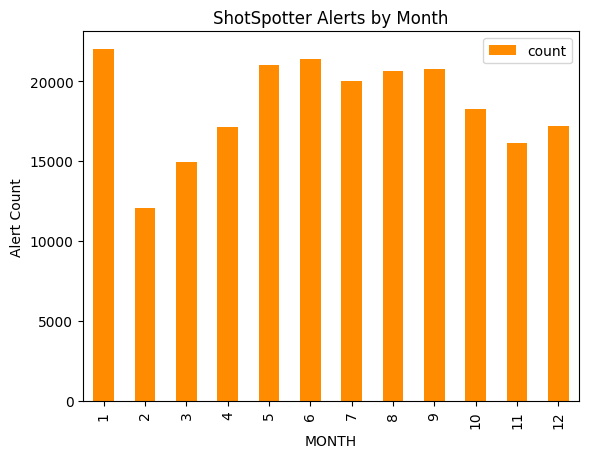

In [572]:
df_shotspotter_month.plot.bar(title="ShotSpotter Alerts by Month", color="darkorange",ylabel="Alert Count")

<Axes: title={'center': 'Average Reported Rounds per Hour'}, ylabel='Average rounds'>

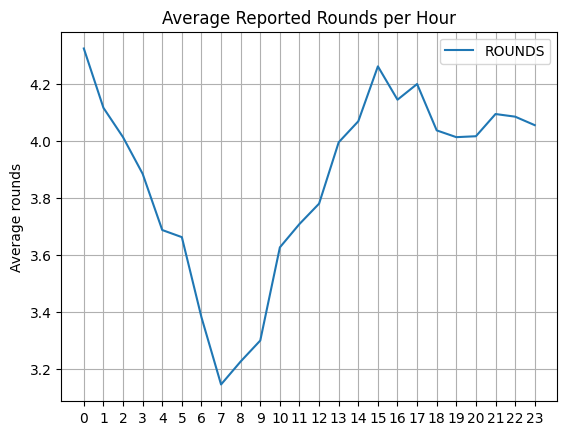

In [573]:
df_shotspotter_avg_rounds_hour.plot.line(x="HOUR",y="ROUNDS",title="Average Reported Rounds per Hour",use_index=False,grid=True,xticks=range(0,24), xlabel="Hour of Day (24 hr)", ylabel="Average rounds")

The graph above shows the general average rounds fired, but what does this look like when we filter for single incident types? 

Here is a visualization of multiple gunshots, single gunshot, and gunshot or firecracker (other) reports over a 24 hour span.

<Axes: title={'center': 'Average Reported Rounds per Hour Across Incident Types'}, ylabel='Average rounds'>

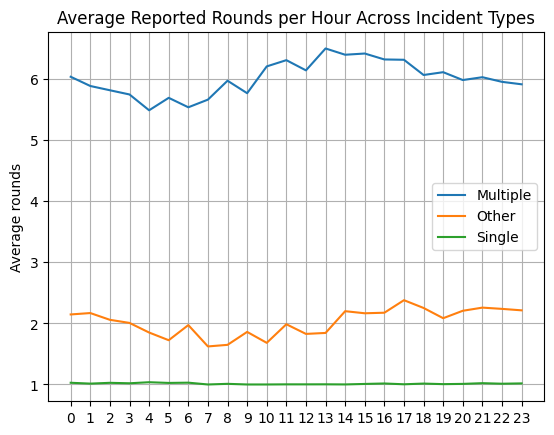

In [574]:
df_combined_average_rounds = pd.concat([df_multiple_count["ROUNDS"],df_other_count["ROUNDS"],df_single_count["ROUNDS"]], axis=1)
df_combined_average_rounds.columns = ['Multiple','Other','Single']
df_combined_average_rounds.plot(title="Average Reported Rounds per Hour Across Incident Types",use_index=False,grid=True,xticks=range(0,24), xlabel="Hour of Day (24 hr)", ylabel="Average rounds")

The graph below shows the total number of reports for each incident type, with multiple gunshots being the highest report incident type.

<Axes: title={'center': 'Reports for Each Incident Type'}, xlabel='Incident Type', ylabel='Report Count'>

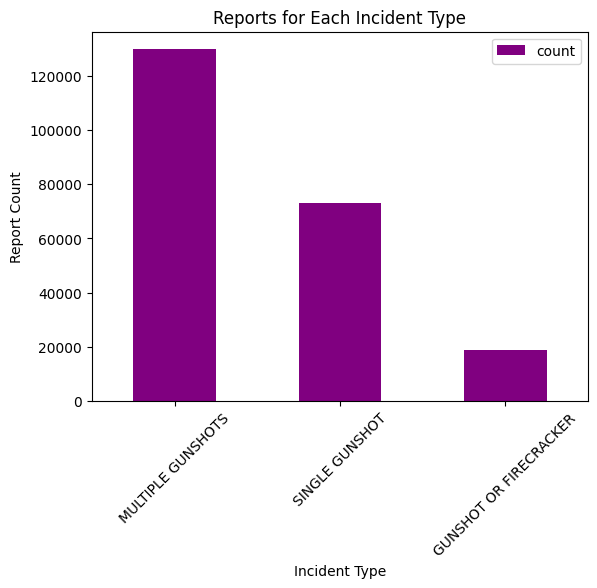

In [575]:
df_shotspotter_description.plot.bar(title="Reports for Each Incident Type",xlabel="Incident Type",ylabel="Report Count",rot=45,color="purple")

Visualizing ward counts vs ShotSpotter Alert counts 

<Axes: title={'center': 'Top 10 Wards vs ShotSpotter Alert Count'}, xlabel='WARD', ylabel='Total Report Count in Ward'>

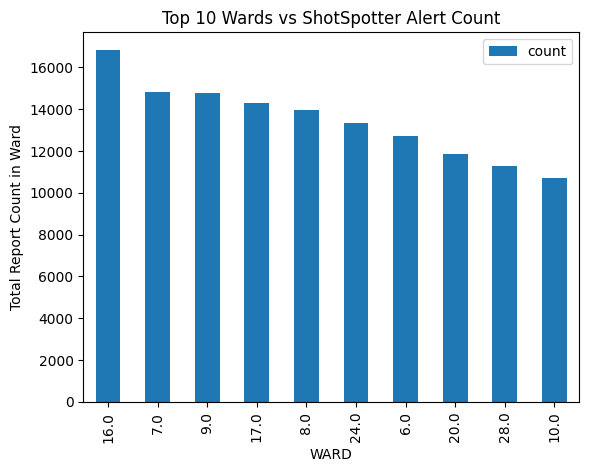

In [576]:
df_shotspotter_ward.head(10).plot.bar(ylabel = "Total Report Count in Ward", title = "Top 10 Wards vs ShotSpotter Alert Count")

Instead of using the ward number, this will be plotting the top 20 communities with the highest ShotSpotter Alert counts.

<Axes: title={'center': 'Top 10 Communities With Highest ShotSpotter Alert Counts'}, xlabel='COMMUNITY_AREA', ylabel='Alert Count'>

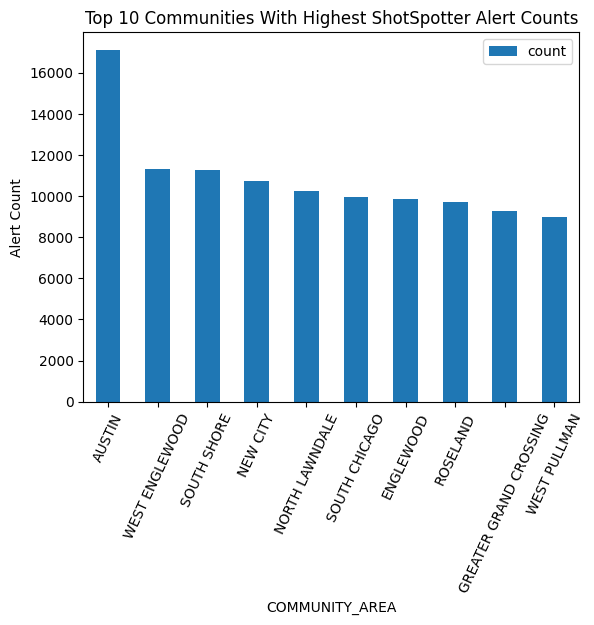

In [577]:
df_shotspotter_community.head(10).plot.bar(ylabel = "Alert Count", title = "Top 10 Communities With Highest ShotSpotter Alert Counts", rot=65)

**Summary of what the visualizations in this section show:**
* Shotspotter alerts are generally higher in the warmer months of a year, but January had the highest total ShotSpotter alerts.
* Generally, hour 15 (3 pm) has the highest average amount of gunshots reported, with the calmest period being at 7 am.
* However, the highest average amount of gunshots reported is 1 pm when filtering for "multiple gunshots" reported.
* Multiple gunshots has the highest count (120k+) in the dataframe, which is more than half of all ShotSpotter alerts.
* Ward 16 is the ward with the highest alerts and Austin is the community with the highest alerts.

## 2. df_demographic Visualizations

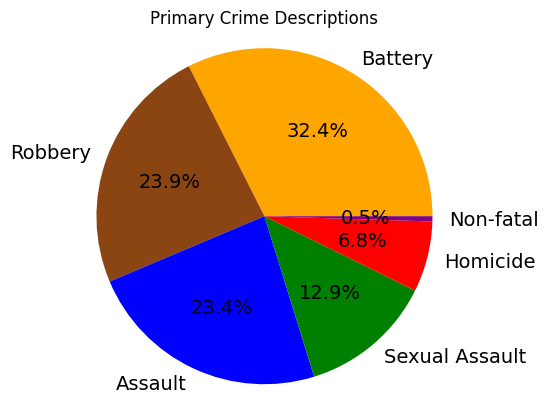

In [578]:

labels = ["Battery","Robbery","Assault","Sexual Assault","Homicide","Non-fatal"]
sizes = [32.4, 23.9, 23.4, 12.9, 6.8, 0.5]
colors = ["orange","saddlebrown","blue","green","red","purple"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, textprops={'fontsize': 14})
ax.axis('equal')
plt.title("Primary Crime Descriptions")
plt.show()

The red line below indicates when ShotSpotter was implemented in Chicago (2017). The colors of the line match the above pie chart.

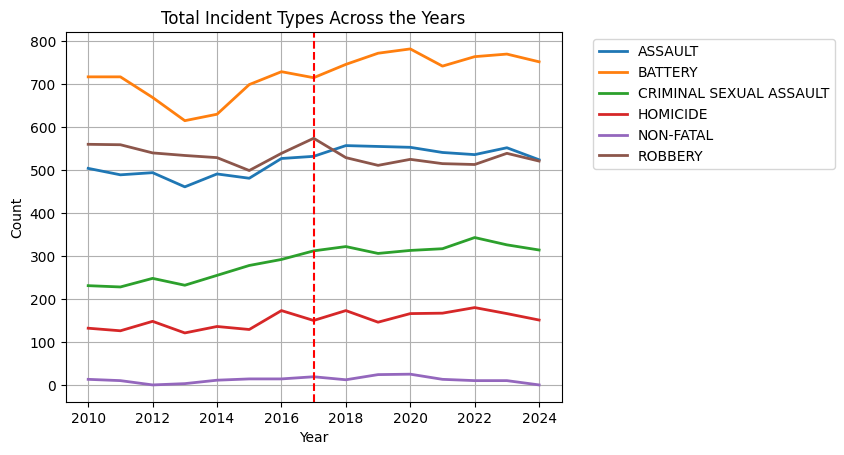

In [579]:
ax = df_demographic_pivot.plot.line(ylabel="Count",grid=True, linewidth=2, title="Total Incident Types Across the Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axvline(x=2017, color='red', linestyle='dashed') 

**Summary of what the visualizations in this section show:**
* Battery accounts for nearly 1/3 of all victimization aggregations.
* Assault, battery, and criminal sexual assault seem to be on a constant rise over the years.
* The red line represents when ShotSpotter was massively implemented in Chicago. The true answer to finding whether or not rates across crime types decreased after ShotSpotter was implemented will be found in the Hypothesis Testing section of part 2.

## 3. df_shootings Visualizations

<Axes: title={'center': 'Top 10 Most Common Shooting Locations'}, xlabel='LOCATION_DESCRIPTION', ylabel='Incident Count'>

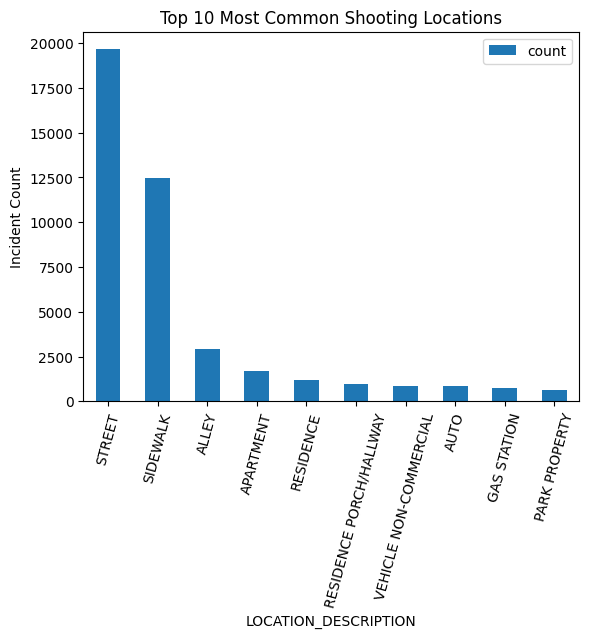

In [580]:
df_shootings_locations.head(10).plot.bar(x="LOCATION_DESCRIPTION",y="count",rot=75,ylabel="Incident Count", title="Top 10 Most Common Shooting Locations")

The red line also represents the year ShotSpotter was implemented in Chicago (2017).

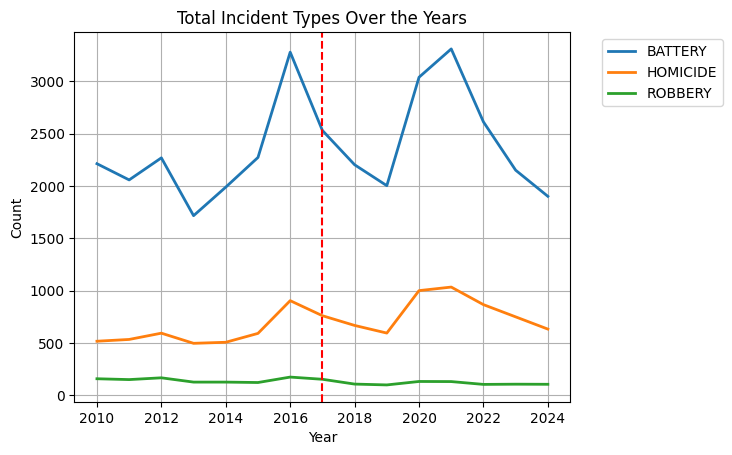

In [581]:
ax = df_shootings_pivot.plot.line(ylabel="Count",grid=True, linewidth=2,title="Total Incident Types Over the Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axvline(x=2017, color='red', linestyle='dashed') 

Geographic visualizations of df_shootings by ward

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

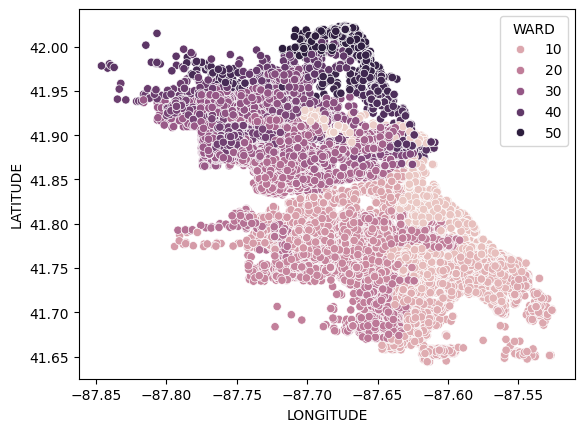

In [582]:
seaborn.scatterplot(data=df_shootings, x="LONGITUDE", y="LATITUDE",hue=df_shootings["WARD"])

**Summary of what the visualizations in this section show:**
* The top 3 most common places for shootings occur outside, with the fourth most common place being in apartments.
* Total battery and homicide counts peaked in 2021.
* Chicago's ward system increases the ward number as the latitude moves north.

## Section 4 - Planning for Part II

### Relevant observations from my EDA/Visualization sections:

1. df_shotspotter:
* The average amount of rounds reported by ShotSpotter alerts was 4.
* The average amount of reported rounds peaks around midnight and hour 15 of the day (3 pm). However, when observing the average amount of reported gunshots for "multiple" rounds type, number peaks at around 1 pm. In general, shotspotter alerts seem to be the lowest at 7 am.
* After summing reports across the seven years, January had the highest amount of ShotSpotter alerts. However, shotspotter alerts seem to rise in warmer months apart from January.
2. df_demographic:
* Battery accounts for 32.4% of all reported victimizations.
* Battery and sexual assault victimizations seem to be on a steady rise from 2010 to present.
3. df_shootings:
* Approximately 97.85% of the victimizations in df_shootings resulted in a gunshot injury.
* Battery and homicide total counts peaked in 2021.
* Most shootings occurred in streets, sidewalks, alleys, apartments, residences, respectively. 

### What is a question I want to to answer by the end of this project?


As stated in section 1, the datasets will allow me to evaluate if Shotspotter technology was effective or not during its seven year lifetime in Chicago. However it is important to know that the use was controversial due to the prevalence of Shotspotter technology in Black and Latino neighborhoods. I might be able to use hypothesis testing to answer a question about the use of Shotspotters in Chicago and whether or not they helped reduce gun violence rates or victimization rates. 

# You and Data Science - Part II

## Section 5 - Data Science

### Hypothesis Testing - Gun Violence Rates Before and After 2017

Going back to part I, **df_shotspotter** began having entries in 2017-2024 (7 year span), **df_demographic** and **df_shootings** were filtered to have entries from 2010 to 2024 (14 year time span). With the implementation of Shotspotter in 2017, we get a convenient split of 7 years where the shotspotter was **not implemented** and 7 years where it **was implemented**.

When doing a hypothesis test, it is important to first set up the actual hypotheses we are testing for:

**H<sub>0</sub>** : There is no significant difference in gun violence injury rates before and after the implementation of ShotSpotter (X1 = X2).

**H<sub>A</sub>** : There is a significant difference in gun violence injury rates before and after the implementation of ShotSpotter (X1 ≠ X2).

This follows a **two-tailed two sample** z-test since we are comparing gun violence injury rates before and after 2017 and we are also not specifying a direction to have a fair test. This z-test will include an alpha value of 0.05 for testing.

To complete this hypothesis test, we need to use **df_demographic** as it contains information about victimizations that did or did not result in gunshot injuries. The reason **df_shootings** is not used is since ~97.85% of the time (figure taken from EDA), the case involved a gunshot injury, which does not give much insight on shootings before and after 2017.

In [583]:
df_demographic.sample(1)

,TIME_PERIOD,TIME_PERIOD_START,TIME_PERIOD_END,PRIMARY_TYPE,AGE,SEX,RACE,JUVENILE_I,DOMESTIC_I,GUNSHOT_INJURY_I,NUMBER_OF_VICTIMS,Year,Quarter
45314,2014 Q2,03/01/2014,06/30/2014,BATTERY,30-39,M,BLK,False,True,YES,2,2014,2


In [584]:
df_demographic["GUNSHOT_INJURY_I"].unique()

array(['NO', 'YES'], dtype=object)

Due to the column "GUNSHOT_INJURY_I" being a string value, a "YES" needs to be mapped to a 1 and a "NO" needs to be mapped to a 0.

In [585]:
def encodeGunshotInjury(row):
    if row == "YES":
        return 1
    elif row == "NO":
        return 0

df_demographic["Encoded Gunshot Injury"] = df_demographic["GUNSHOT_INJURY_I"].apply(encodeGunshotInjury)


In [586]:
df_demographic.sample(1)

,TIME_PERIOD,TIME_PERIOD_START,TIME_PERIOD_END,PRIMARY_TYPE,AGE,SEX,RACE,JUVENILE_I,DOMESTIC_I,GUNSHOT_INJURY_I,NUMBER_OF_VICTIMS,Year,Quarter,Encoded Gunshot Injury
43794,2019 Q3,07/01/2019,09/30/2019,BATTERY,40-49,M,WHI,False,False,YES,3,2019,3,1


In [587]:
df_demographic_2010_to_2017 = df_demographic[df_demographic["Year"] <= 2017]

df_demographic_2017_to_2024 = df_demographic[df_demographic["Year"] >= 2017]

In [588]:
z_test_result = ztest(
    x1 = df_demographic_2010_to_2017["Encoded Gunshot Injury"],
    x2 = df_demographic_2017_to_2024["Encoded Gunshot Injury"],
    value = 0,
    alternative = "two-sided"
)
z_test_result

(np.float64(-4.147498289200797), np.float64(3.3612798084631716e-05))

The returned **p-value** is 3.3612798084631716e-05, which is less than the established alpha value of 0.05.

Therefore, we reject the null hypothesis and there is now evidence that gunshot injury rates are statistically different before and after 2017. This following cell extracts the average gunshot injury for each time period. It was found that the average gunshot injury rates were ~14.39% (2010-2017) vs ~15.96% (2017-2024). 

In [589]:
mean_x1 = df_demographic_2010_to_2017["Encoded Gunshot Injury"].mean()
mean_x2 = df_demographic_2017_to_2024["Encoded Gunshot Injury"].mean()

print(f"Gunshot Injury Rates BEFORE the implementation: {mean_x1} \nGunshot Injury Rates AFTER the implementation: {mean_x2}")

Gunshot Injury Rates BEFORE the implementation: 0.14386088178464781 
Gunshot Injury Rates AFTER the implementation: 0.1596448748991122


### Hypothesis Testing - Gunshot Rates Throughout the Seasons

I am hypothesizing that gunshot injuries are higher in the summer due to more activity outside and more heat which may or may not lead people to act more violent.

**H<sub>0</sub>** : There is no significant difference in gun violence rates between summer and winter months (X1 = X2).

**H<sub>A</sub>** : Gun violence rates are higher in the summer than winter months (X1 > X2).

This follows a **one-tailed two sample** z-test since we are also specifying a direction with this test. The z-test will follow an alpha value of 0.05.

To first do this test, I need to create two dataframes using **df_shootings**: one that includes all the summer months (June, July, August, September) and one that includes all the winter months (December, January, February). 

Something to keep in mind: since the rows in **df_demographic** each represent an aggregated report, the date of occurrence is grouped by month and it does not have specific dates. For example, a group of reports that occurred in different dates in June will simply have a date of 07/01/20XX, and the finish date may not be until months later since it is a group of cases. For the reasons mentioned, I will be using **df_shootings** instead. 

In [590]:
# this will be useful in the 2 following hypothesis tests 
df_shootings["Gunshot Injury (Encoded)"] = df_shootings["GUNSHOT_INJURY_I"].apply(encodeGunshotInjury)

In [591]:
df_shootings_summer = df_shootings[(df_shootings["Month"]>=7) & (df_shootings["Month"]<=9)] # June, July, August, September
df_shootings_winter = df_shootings[(df_shootings["Month"]==12) | (df_shootings["Month"]==1) | (df_shootings["Month"]==2)] # December, January, February

In [ ]:
z_test_result3 = ztest(
    x1 = df_shootings_summer["Gunshot Injury (Encoded)"],
    x2 = df_shootings_winter["Gunshot Injury (Encoded)"],
    value = 0,
    alternative = "larger" # X1 > X2
)
z_test_result3

(np.float64(4.679122819042018), np.float64(1.4405241610060155e-06))

The p-value returned is 1.4405241610060155e-06 which is less than the established alpha value of 0.05. Therefore, we reject the null hypothesis and there is evidence that gunshot injury rates are generally higher in the summer months of a year.

## Section 6 - A Different Data Visualization

### Creating a Geographical Heatmap of Shooting Injuries

This visualization will capture shooting injuries on a heatmap. The **df_shootings** dataset contains a location and longitude column that can be used for a heatmap.

In [595]:
# creating a dataframe where only gunshot injuries occurred:
df_shootings_injuries_only = df_shootings[df_shootings["Gunshot Injury (Encoded)"]==1]

In [596]:
# convert to GeoDataFrame using longitude (x) and latitude (y) columns
gdf_shootings_injuries_only= gpd.GeoDataFrame(data=df_shootings_injuries_only, geometry=gpd.points_from_xy(df_shootings_injuries_only["LONGITUDE"], df_shootings_injuries_only["LATITUDE"]))

# create the base (which will be an interactive map starting at Chicago)
gdf_shootings_injuries_only = gdf_shootings_injuries_only.dropna()
base_map = folium.Map(location=[gdf_shootings_injuries_only['LATITUDE'].mean(), gdf_shootings_injuries_only['LONGITUDE'].mean()], zoom_start=12)

# add each entry to the heat_data
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in gdf_shootings_injuries_only.iterrows()]
HeatMap(heat_data).add_to(base_map)

In [597]:
map_title = "Geographical Heatmap of Confirmed Gunshot Injuries in Chicago (2010 - 2024)"
title_html = f'<h1 style="position:absolute;z-index:100000;left: 20vw" >{map_title}</h1>'
base_map.get_root().html.add_child(folium.Element(title_html))
base_map

### Visualizing Wards and Gunshot Injuries

Although this following visualization is also a seaborn scatterplot, it is a more helpful plot in terms of thinking about the wards with the highest gunshot injuries from 2010 to 2024, as the plot in part I simply ended up visualizing Chicago's ward system.

In [598]:
df_shootings_ward = df_shootings[["WARD", "LONGITUDE", "LATITUDE", "Gunshot Injury (Encoded)"]].groupby("WARD").agg({
    "LONGITUDE": "mean",
    "LATITUDE": "mean",
    "Gunshot Injury (Encoded)": "count"
})
df_shootings_ward["WARD"] = df_shootings_ward.index

In [599]:
df_shootings_ward

,LONGITUDE,LATITUDE,Gunshot Injury (Encoded),WARD
WARD,,,,
1.0,-87.680579,41.908851,275,1.0
2.0,-87.630344,41.902843,108,2.0
3.0,-87.622808,41.818070,1172,3.0
4.0,-87.608731,41.824242,634,4.0
5.0,-87.583130,41.771708,1039,5.0
6.0,-87.622708,41.759547,2506,6.0
7.0,-87.562801,41.745934,1906,7.0
8.0,-87.593992,41.744126,1922,8.0
9.0,-87.623467,41.693048,2337,9.0


**How to read this graph:**


The more intense the color is, the more gunshot injuries there were in that ward (represented by a dot). Also, the larger a dot is, the more gunshot injuries there were in that ward.

Text(0.5, 1.0, 'Wards vs. Total Gunshot Injuries (2010-2024)')

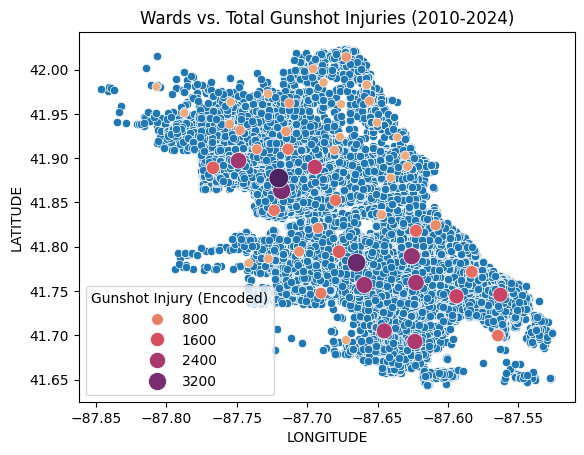

In [600]:
seaborn.scatterplot(data=df_shootings, x="LONGITUDE", y="LATITUDE")
seaborn.scatterplot(data=df_shootings_ward, x="LONGITUDE", y="LATITUDE", hue=df_shootings_ward["Gunshot Injury (Encoded)"], size=df_shootings_ward["Gunshot Injury (Encoded)"],sizes=(40, 200), legend=True, palette="flare").set_title("Wards vs. Total Gunshot Injuries (2010-2024)")

<Axes: title={'center': 'Top 10 Wards With Highest Total Gunshot Injuries (2010-2024)'}, xlabel='WARD'>

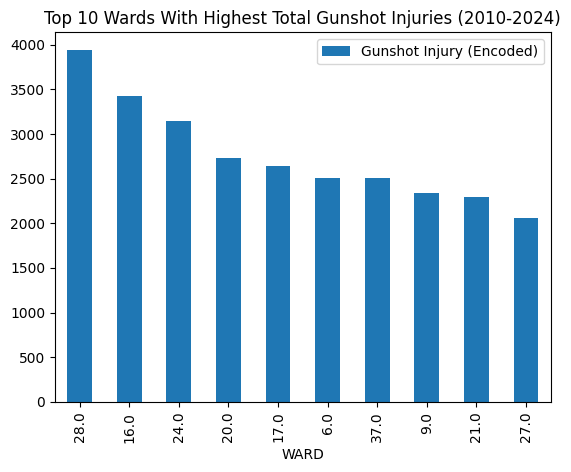

In [601]:
# Top 10 wards with highest gunshot injury rates from 2010 to 2024 (14 year span)
df_shootings_ward.nlargest(columns="Gunshot Injury (Encoded)",n=10).plot.bar(x="WARD",y="Gunshot Injury (Encoded)", title="Top 10 Wards With Highest Total Gunshot Injuries (2010-2024)")

Text(0.5, 1.0, 'Top 10 Wards With Highest Total Gunshot Injuries (2010-2024)')

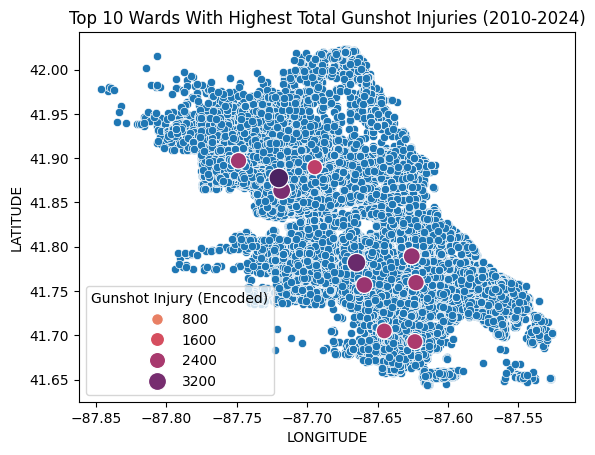

In [602]:
# Top 10 Wards Visualized on a map.
seaborn.scatterplot(data=df_shootings, x = "LONGITUDE", y = "LATITUDE")
seaborn.scatterplot(data=df_shootings_ward.nlargest(columns="Gunshot Injury (Encoded)",n=10), x="LONGITUDE", y="LATITUDE", hue=df_shootings_ward["Gunshot Injury (Encoded)"], size=df_shootings_ward["Gunshot Injury (Encoded)"],sizes=(40, 200), legend=True, palette="flare").set_title("Top 10 Wards With Highest Total Gunshot Injuries (2010-2024)")

### Summary of my Visualizations in Section 6

Overall the visualizations in this section are more geograhical. 

The first visualization here was a geographical heat map, something I wanted to try accomplishing using my latitude/longitude data. The actual heat data plotted on the base map came from a dataframe with confirmed gunshot injuries only. The map is interactive and is able to be zoomed in to very specific locations where a gunshot injury occurred. 

The second visualization was a plot of wards vs their total gunshot injuries in the time frame of 2010 to 2024. I used a blue base that just plotted rows in df_shootings to sculpt out the Chicago map. On top of the blue base, was the actual ward vs. total gunshot injuries scatter plot. 

The third visualization consisted was a bar plot, which was something I did do in part I as a part of my first visual but I wanted to include it to give numbers to the top 10 wards on the map with the highest gunshot injuries. 

The fourth and final visualization was a continuation of the previous bar plot since it plotted the top 10 wards on a scatterplot.

## Section 7 - An Overall Summary

This project dived into gun violence in Chicago from the years of 2010 to 2024, with a focus on 2017, the year ShotSpotter (a gunshot detecting technology) was implemented. In order to gain more insights on this topic, three datasets were obtained from the City of Chicago Data Portal: one which consisted of ShotSpotter alerts from 2017 to 2024, another which consisted of aggregated victimizations from 1991 to 2024, and a final one which consisted of homicide and non-fatal shooting victimizations from 1991 to 2024. The datasets were filtered to include only reports from 2010 to 2024, since ShotSpotter was implemented in 2017 and this would allow me to have an even split across the data. Also, this split would help keep this analysis relevant by filtering for 2010 to present. Once I prepared the datasets for analysis and visualization, I began by finding descriptive statistics of each dataset then preparing the data for any visualizations I would do. 

The main findings across my EDA, visualization, and data science sections will be described here. The three communities with the highest ShotSpotter alerts were Austin (17122), West Englewood (11340), and South Shore (11265), respectively, with ShotSpotter alerts being the highest in January, and generaly rising during warmer months of the year. Performing a hypothesis test to test for Gunshot injuries in the summer vs winter months showed that there were more confirmed gunshot injuries during the warmer months of a year. To actually the question on ShotSpotter effectiveness, a two-sample two-sided z-test was ran to check if gunshot rates were statistically different before and after the implementation of ShotSpotter (2017) and it was found that there is a statistically significant difference (p-value = ~0.00003). Finding the mean gunshot injuries before and after 2017 showed that the average rate before 2017 was ~14.39% and ~15.96% after 2017. An interactive geographical heatmap allowed me to visualize confirmed gunshot injuries throughout Chicago from 2010 to 2024 with the location data given. Some additional visualizations included a pie chart of primary crime descriptions, where 32.4% of cases were classified as Battery. A final key visual was a map of the top 10 wards with the highest total gunshot injuries from 2010 to 2024. The top three wards with the highest injuries were the 28th, 16th, and 24th wards. 